In [1]:
from models import DBScan
import pandas as pd
from models.model_selection import PlotType, plot
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from itertools import product
from models.metrics import silhouette_score
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

# Load data

In [2]:
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
target_column = 'Fertility'
normalization_type = 'z-score'

In [4]:
from models import preprocessing

X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)
X

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,-1.551550,-0.099522,0.520442,-0.064758,0.538862,0.367142,-0.325777,-1.152019,-1.434709,-0.391355,0.070602,-1.616226,0.364240
1,-0.514111,-0.472208,-1.353762,0.684580,1.462885,1.582164,0.366350,-0.648566,-1.224257,1.281881,-1.418780,0.939661,1.576648
2,-1.205737,0.239284,1.854334,0.544079,-0.243003,1.750917,0.050173,-0.648566,-1.224257,1.347072,-1.467403,0.939661,1.745038
3,-1.288732,-0.709372,-0.197159,0.778247,0.254548,1.177157,0.366350,-0.312930,-1.346702,1.260151,-1.480198,0.939661,1.172512
4,0.274343,0.340926,-0.458872,0.731414,-1.024868,0.907152,2.160649,-1.068110,-1.262521,1.607836,-1.536498,0.939661,0.903088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,1.394778,0.611970,1.052310,2.276924,-0.243003,-1.016634,0.238937,-0.145112,0.241256,-0.565198,0.664307,1.475277,-1.016557
879,0.191348,0.036000,-0.104293,-1.095099,-0.527317,-1.657896,-1.160205,-0.229021,1.607282,-1.086726,-0.116211,-0.070475,-1.656439
880,0.357338,0.103762,-1.083607,0.684580,0.538862,-0.341622,-0.013920,0.358342,-0.187302,-0.695580,-0.500072,-0.496889,-0.342998
881,0.965970,1.662268,-0.906317,-0.439428,0.752098,1.615915,-0.523848,1.700885,0.199165,0.151903,1.232422,0.622449,1.610326


In [5]:
# save the data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

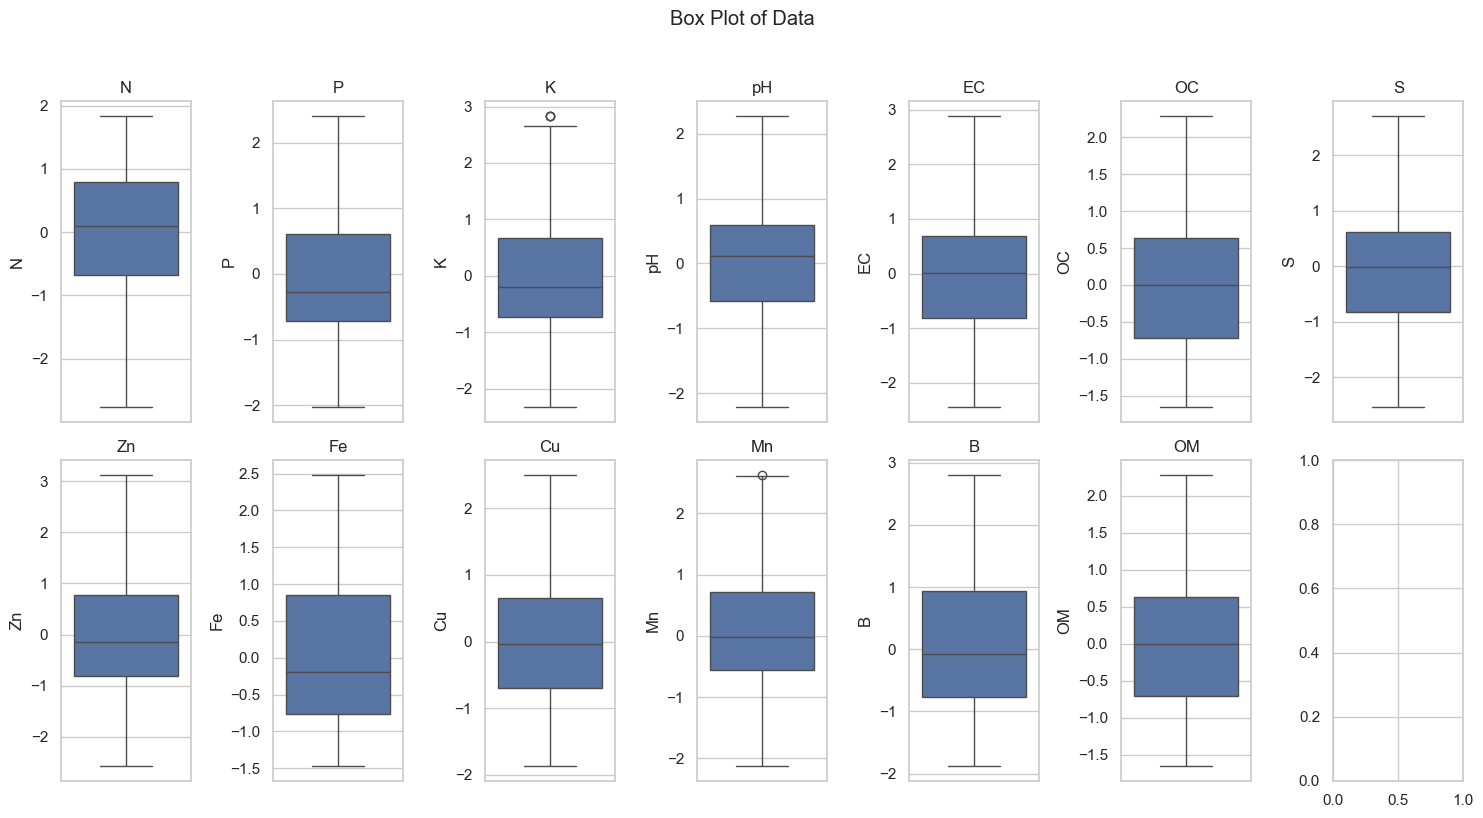

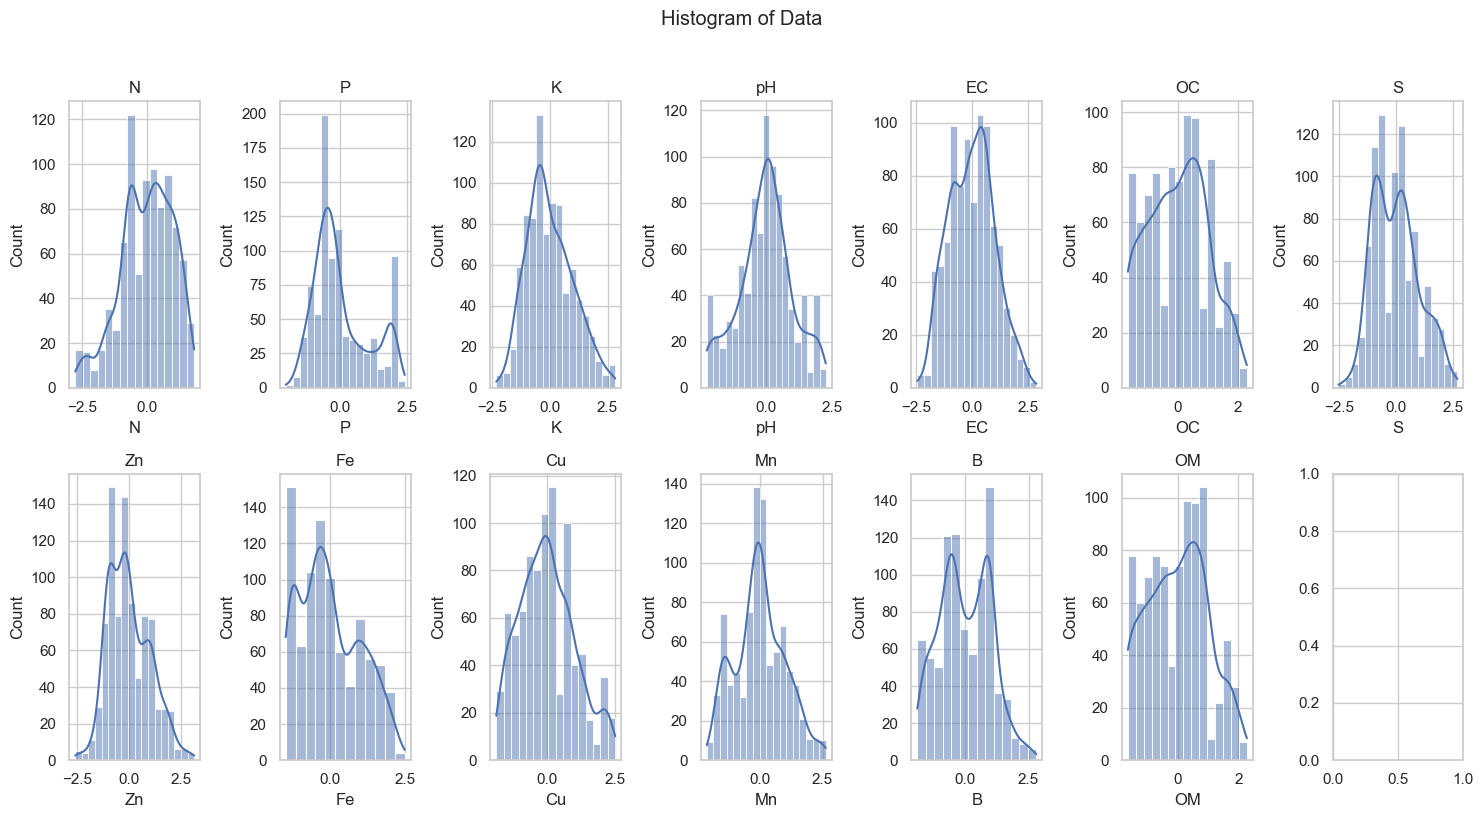

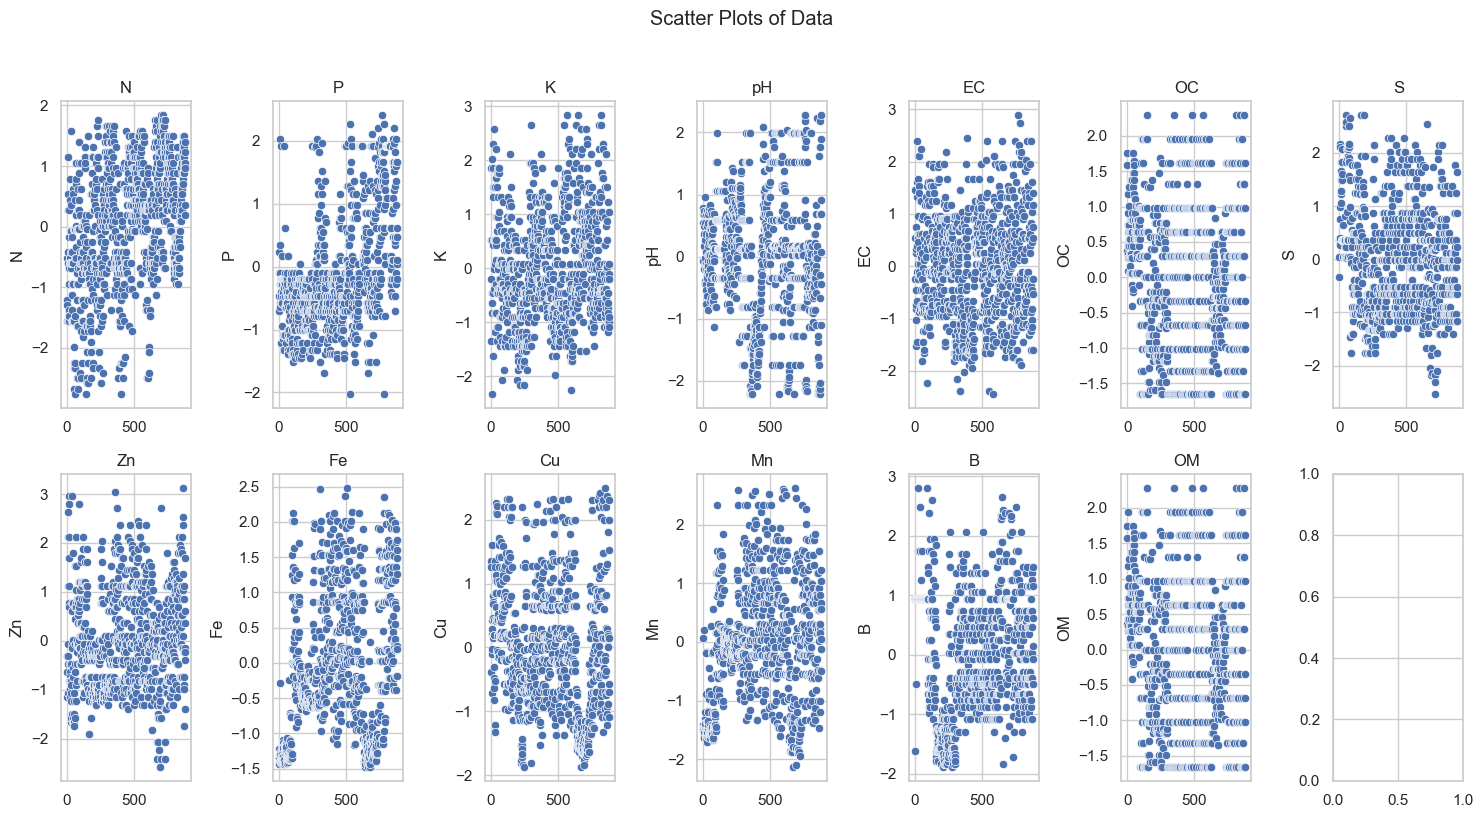

In [6]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [7]:
dbscan = DBScan(eps=0.3, min_samples=4, strategy='cosine')

In [8]:
dbscan.fit(X)

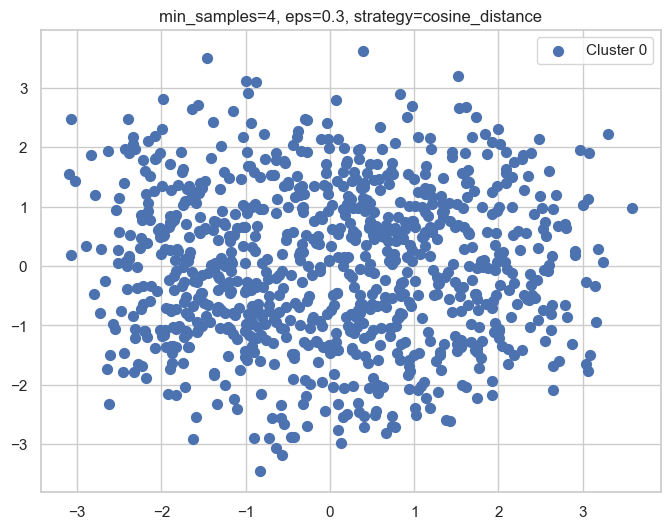

In [9]:
dbscan.plot(X)

In [10]:
params = {
    'eps': [0.2, 0.25, 0.3],
    'min_samples': [2, 4, 7],
    'strategy': ['euclidean', 'cosine']
}

In [11]:
param_combos = list(product(*params.values()))

In [12]:
models = [DBScan(eps=eps, min_samples=min_samples, strategy=strategy) for eps, min_samples, strategy in param_combos]
models

[DBScan(min_samples=2, eps=0.2, strategy=euclidean_distance),
 DBScan(min_samples=2, eps=0.2, strategy=cosine_distance),
 DBScan(min_samples=4, eps=0.2, strategy=euclidean_distance),
 DBScan(min_samples=4, eps=0.2, strategy=cosine_distance),
 DBScan(min_samples=7, eps=0.2, strategy=euclidean_distance),
 DBScan(min_samples=7, eps=0.2, strategy=cosine_distance),
 DBScan(min_samples=2, eps=0.25, strategy=euclidean_distance),
 DBScan(min_samples=2, eps=0.25, strategy=cosine_distance),
 DBScan(min_samples=4, eps=0.25, strategy=euclidean_distance),
 DBScan(min_samples=4, eps=0.25, strategy=cosine_distance),
 DBScan(min_samples=7, eps=0.25, strategy=euclidean_distance),
 DBScan(min_samples=7, eps=0.25, strategy=cosine_distance),
 DBScan(min_samples=2, eps=0.3, strategy=euclidean_distance),
 DBScan(min_samples=2, eps=0.3, strategy=cosine_distance),
 DBScan(min_samples=4, eps=0.3, strategy=euclidean_distance),
 DBScan(min_samples=4, eps=0.3, strategy=cosine_distance),
 DBScan(min_samples=7, eps

In [13]:
silhouette_scores = []
for model in models:
    model.fit(X)
    if len(set(model.labels_)) == 1:
        continue
    results = {"model": str(model), "silhouette_score": silhouette_score(X.to_numpy(), model.labels_, strategy=model.strategy.__name__.split('_')[0])}
    silhouette_scores.append(results)

pd.DataFrame(silhouette_scores).sort_values(by="silhouette_score", ascending=False)


,model,silhouette_score
7,"DBScan(min_samples=4, eps=0.3, strategy=euclid...",0.095508
8,"DBScan(min_samples=7, eps=0.3, strategy=euclid...",0.095508
5,"DBScan(min_samples=7, eps=0.25, strategy=eucli...",0.019342
2,"DBScan(min_samples=7, eps=0.2, strategy=euclid...",-0.042628
4,"DBScan(min_samples=4, eps=0.25, strategy=eucli...",-0.056610
6,"DBScan(min_samples=2, eps=0.3, strategy=euclid...",-0.131000
1,"DBScan(min_samples=4, eps=0.2, strategy=euclid...",-0.155415
3,"DBScan(min_samples=2, eps=0.25, strategy=eucli...",-0.172304
0,"DBScan(min_samples=2, eps=0.2, strategy=euclid...",-0.172379


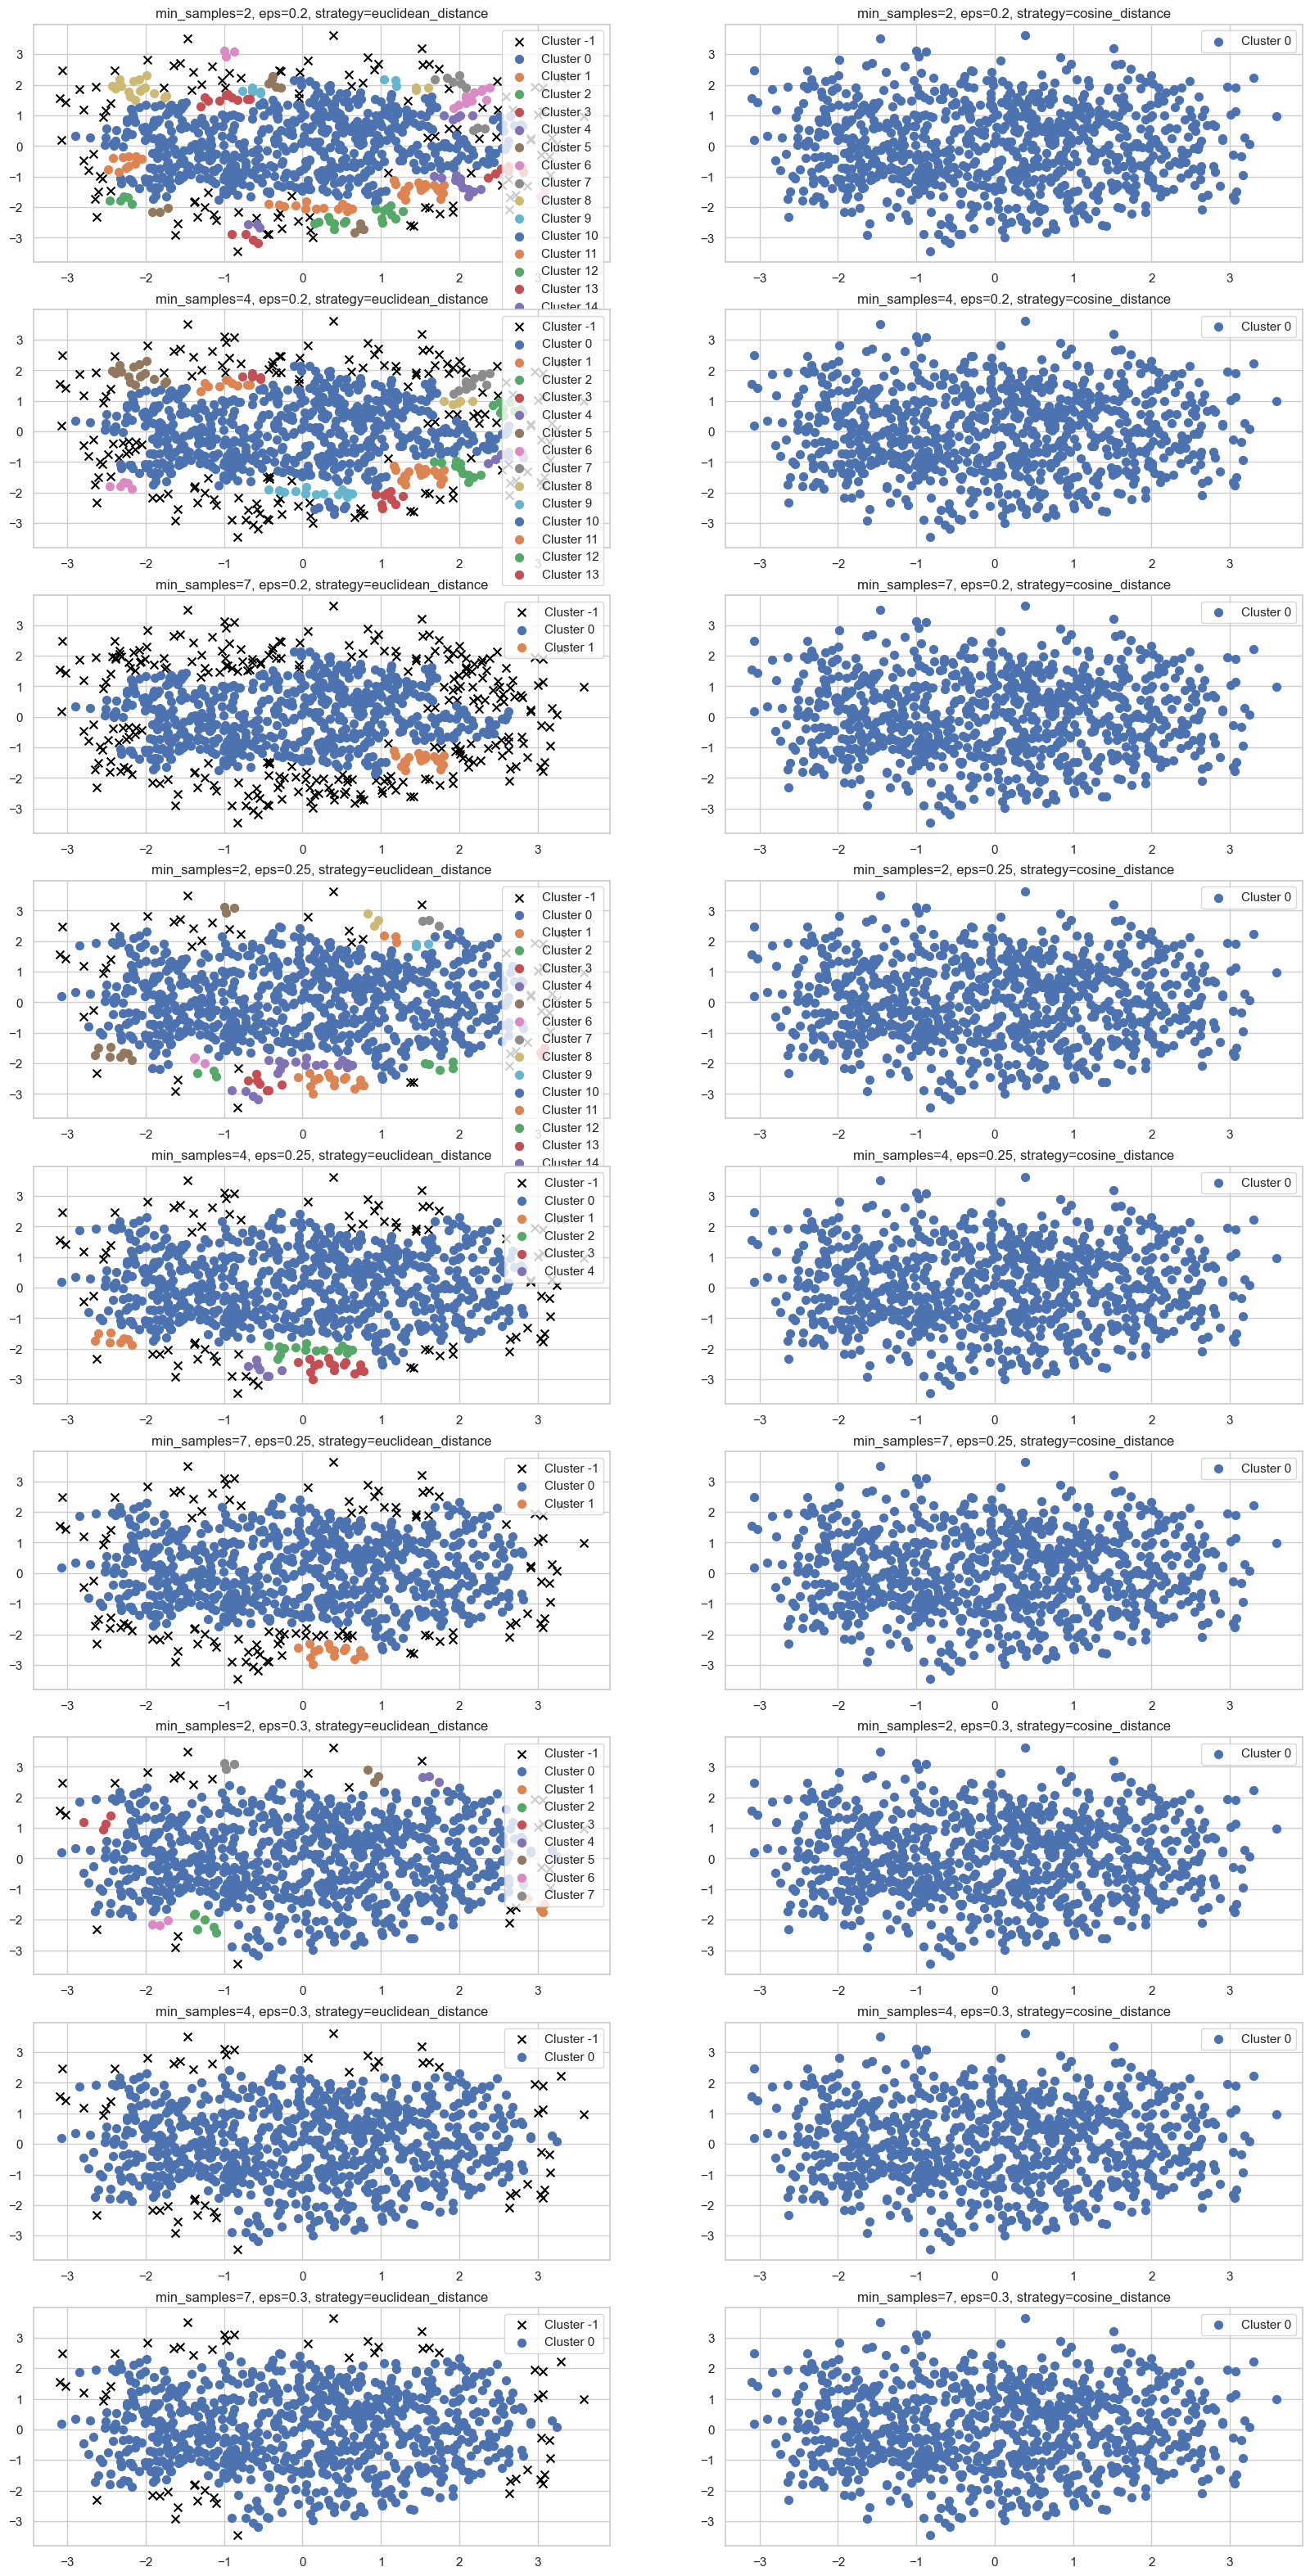

In [14]:
num_rows = (len(models) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 40))
for i, model in enumerate(models):
    row_idx = i // 2
    col_idx = i % 2
    model.plot(X, ax=axes[row_idx, col_idx])